# Introduction to machine learning

Fundamentally, machine learning involves building mathematical models to help understand data. "Learning" enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

**Supervised learning** involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.

**Unsupervised learning** involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.

Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

sns.set_style(style="whitegrid") # set style

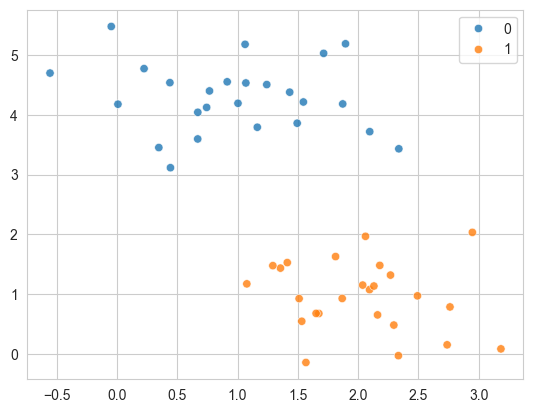

In [2]:
# Classification Example

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# plot the data

sns.scatterplot(x= X[:, 0], y= X[:, 1], hue= y, alpha = .8)
plt.show()

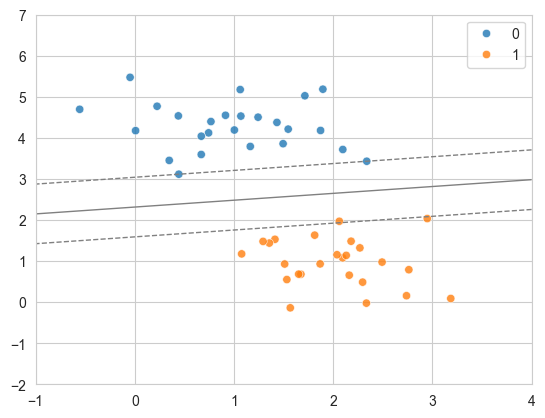

In [3]:
# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
sns.scatterplot(x= X[:, 0], y= X[:, 1], hue= y, alpha = .8)
plt.contour(xy1, xy2, Z,levels = [-1.0, 0.0, 1.0],linestyles = ['dashed', 'solid', 'dashed'],colors = 'gray', linewidths=1)
plt.show()

<Axes: >

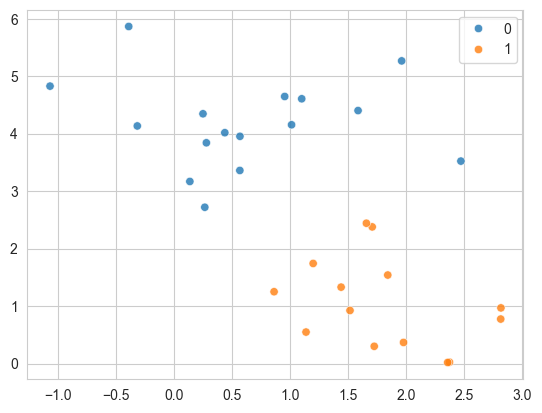

In [7]:
# Now that this model has been trained, it can be generalized to new, unlabeled data. 

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

sns.scatterplot(x= X2[:, 0], y= X2[:, 1], hue= y2, alpha = .8)
